# Explore here

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
data = data.drop_duplicates().reset_index(drop = True)
data.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [4]:
print(f"Data shape = {data.shape}")
data.info()

Data shape = (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


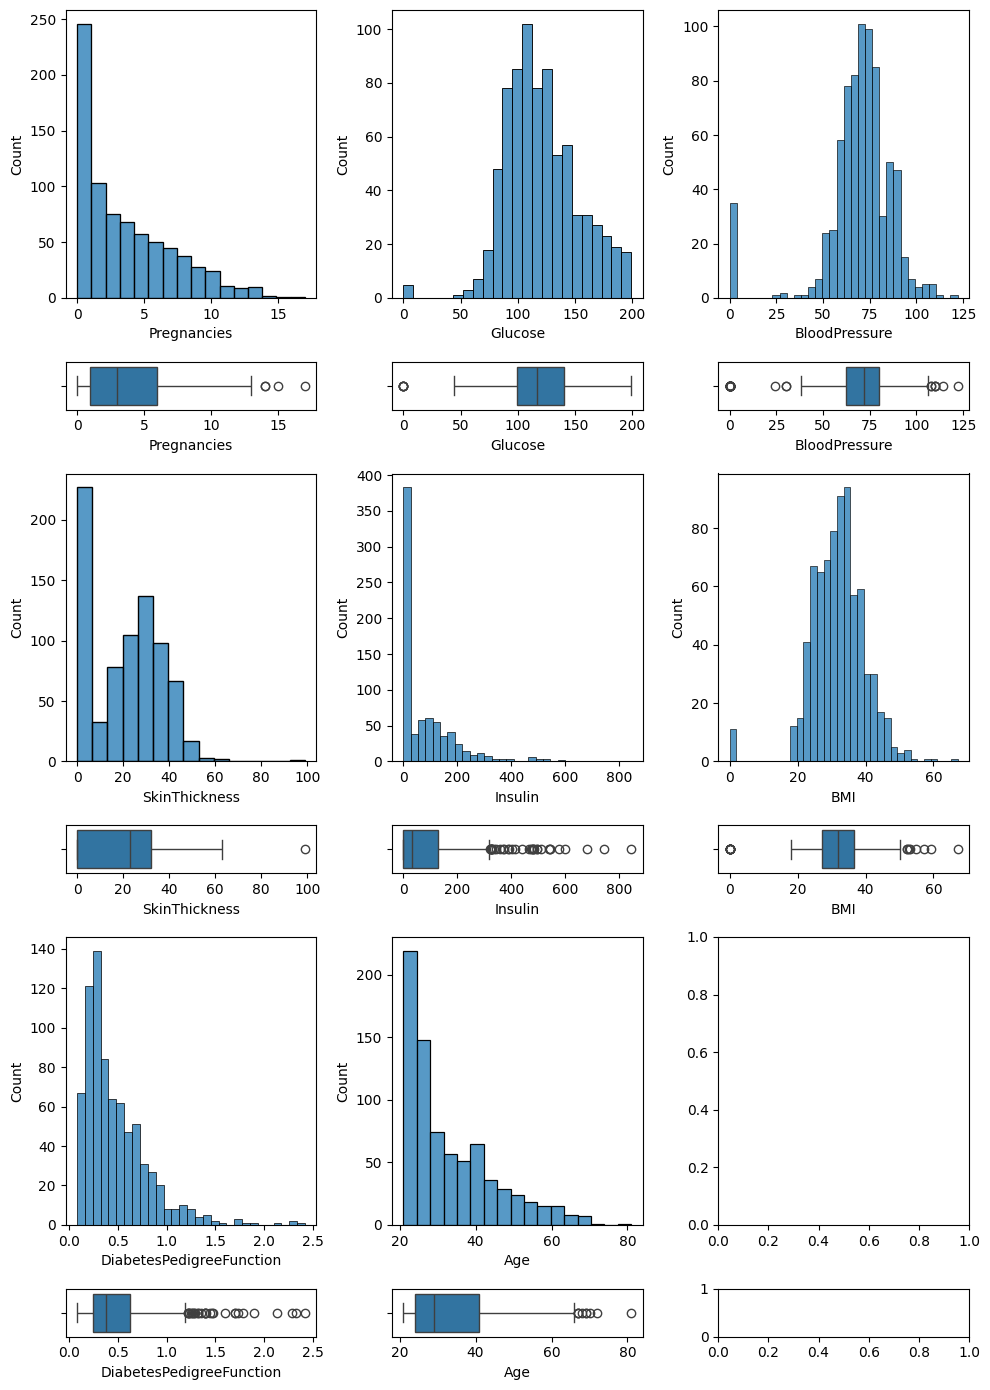

In [2]:
#Analisis numérico
fig, axis = plt.subplots(6, 3, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = data, x = "Pregnancies")
sns.boxplot(ax = axis[1, 0], data = data, x = "Pregnancies")

sns.histplot(ax = axis[0, 1], data = data, x = "Glucose")
sns.boxplot(ax = axis[1,1], data = data, x = "Glucose")

sns.histplot(ax = axis[0, 2], data = data, x = "BloodPressure")
sns.boxplot(ax = axis[1, 2], data = data, x = "BloodPressure")

sns.histplot(ax = axis[2,0], data = data, x = "SkinThickness")
sns.boxplot(ax = axis[3, 0], data = data, x = "SkinThickness")

sns.histplot(ax = axis[2,1], data = data, x = "Insulin")
sns.boxplot(ax = axis[3, 1], data = data, x = "Insulin")

sns.histplot(ax = axis[2,2], data = data, x = "BMI")
sns.boxplot(ax = axis[3, 2], data = data, x = "BMI")

sns.histplot(ax = axis[4,0], data = data, x = "DiabetesPedigreeFunction")
sns.boxplot(ax = axis[5, 0], data = data, x = "DiabetesPedigreeFunction")

sns.histplot(ax = axis[4,1], data = data, x = "Age")
sns.boxplot(ax = axis[5, 1], data = data, x = "Age")


plt.tight_layout()

plt.show()
     

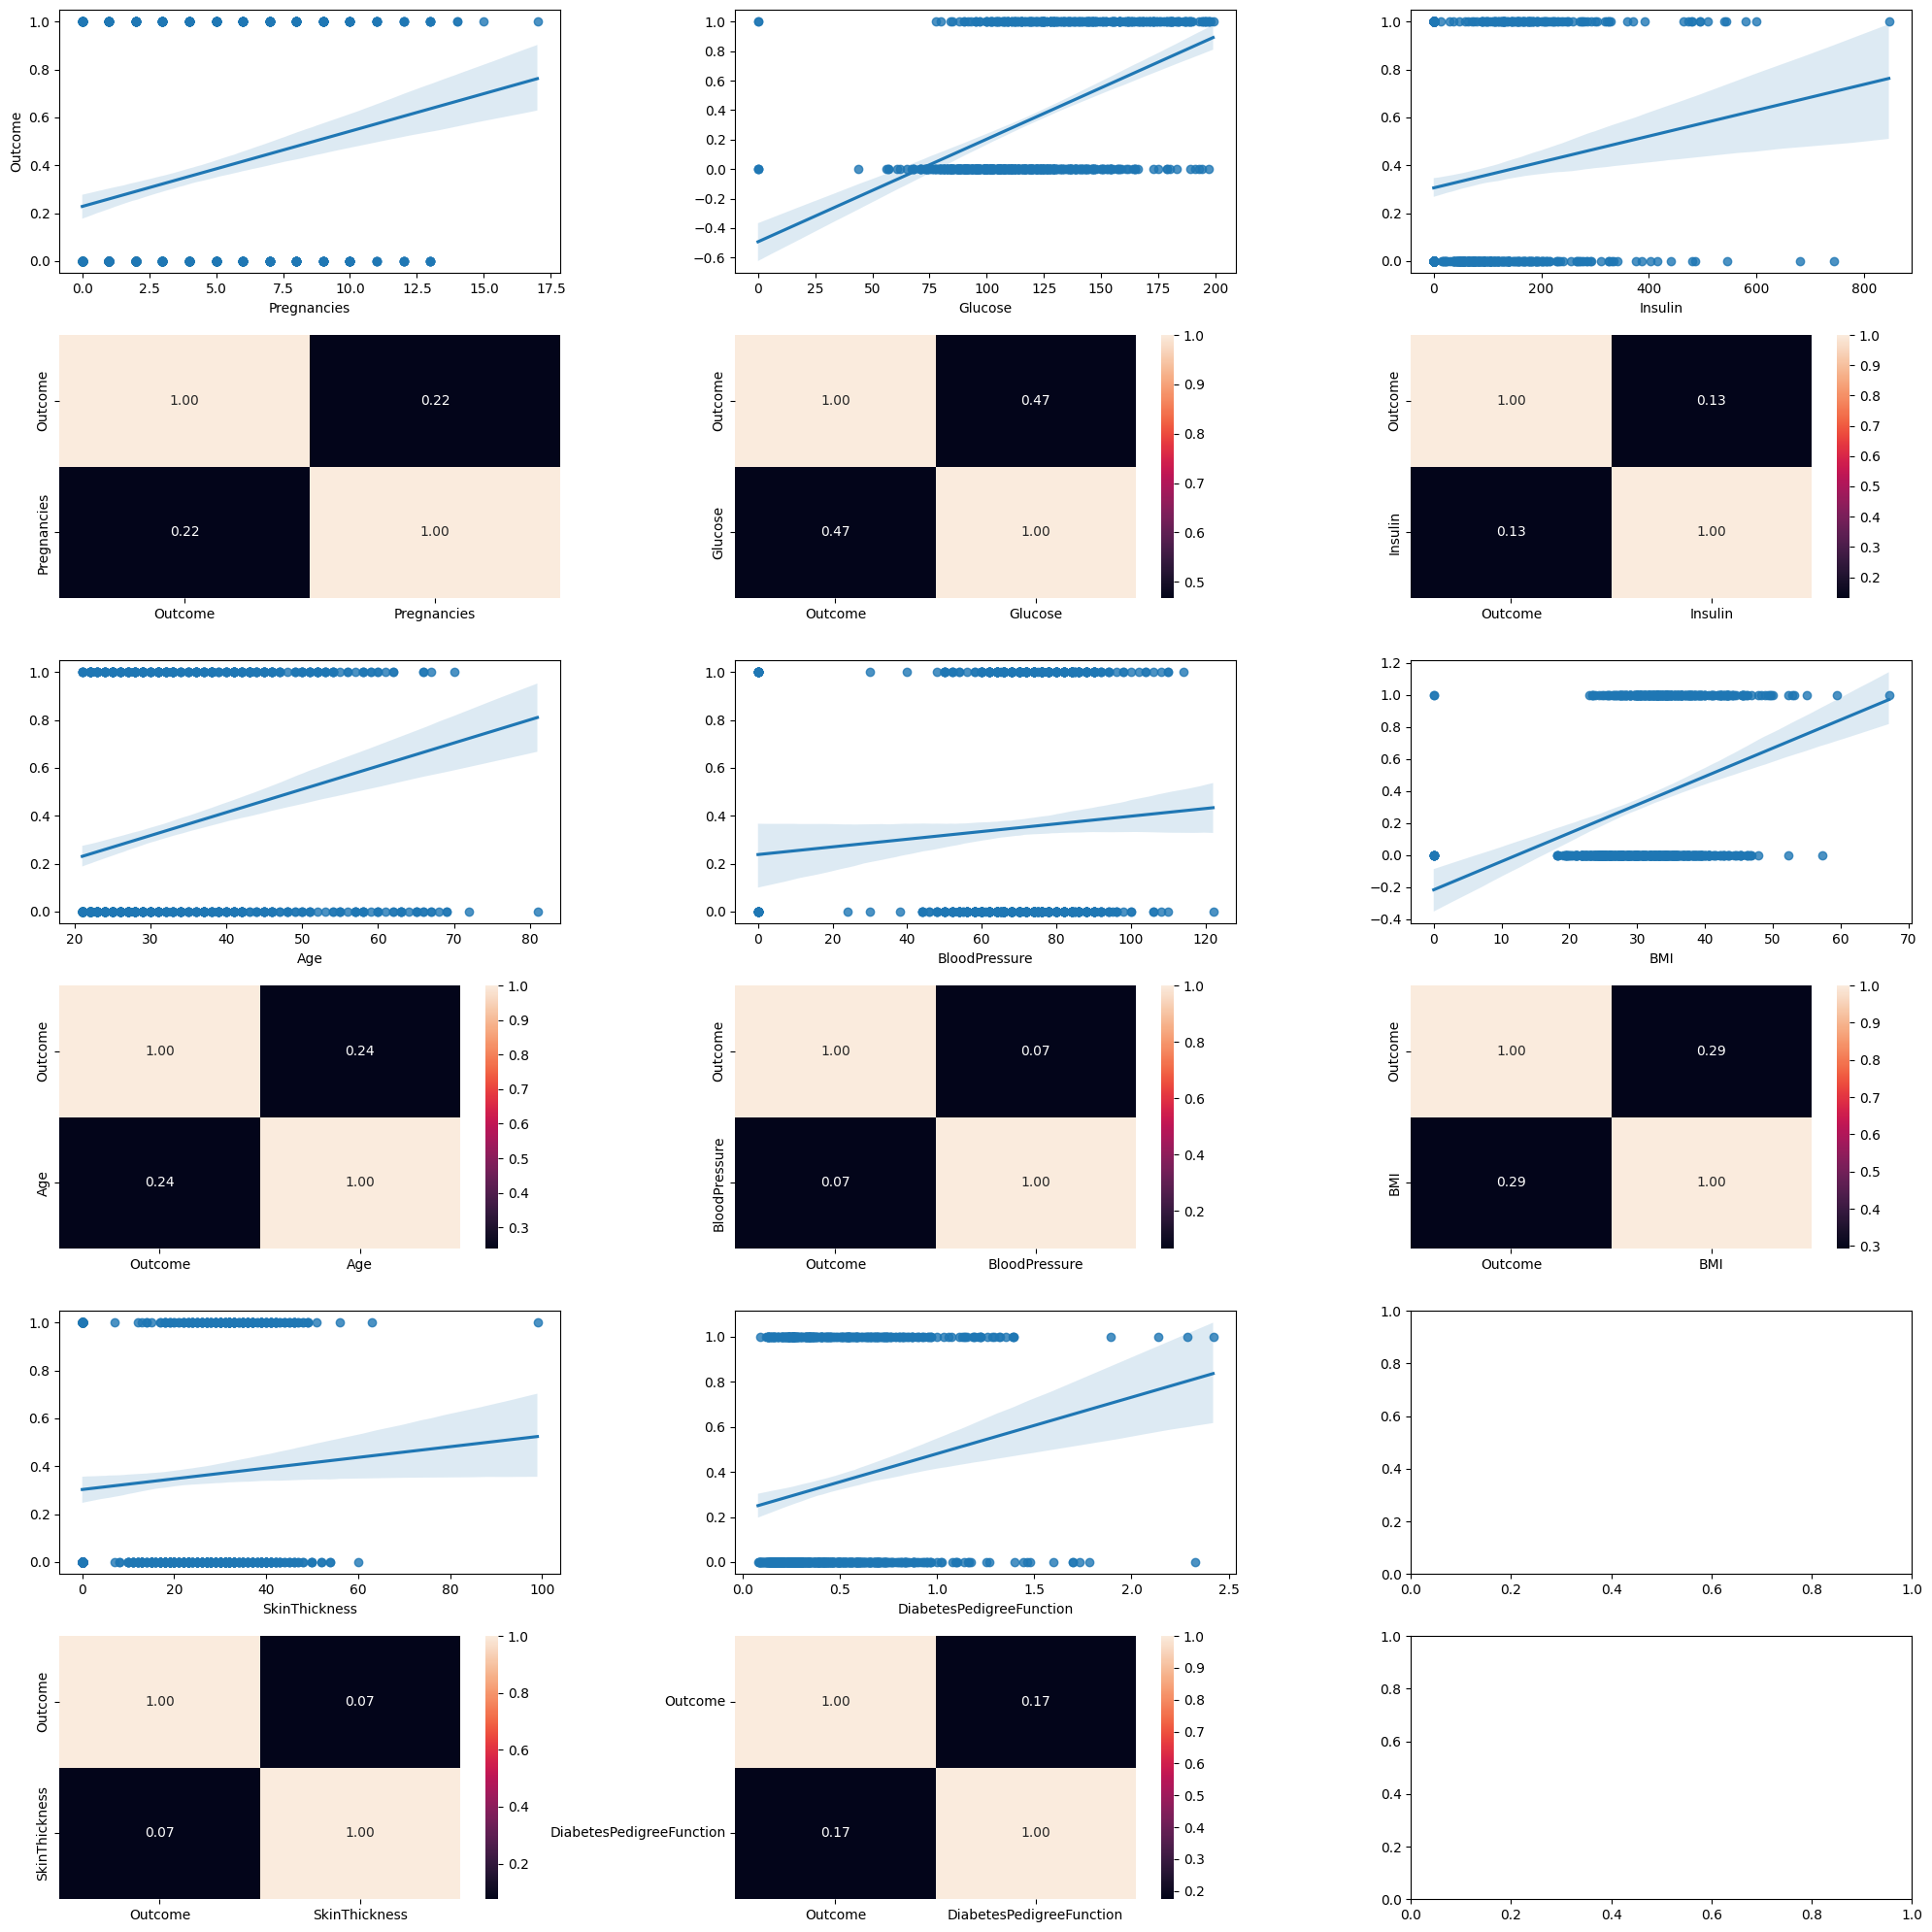

In [8]:
#Analisis multivariante
fig, axis = plt.subplots(6, 3, figsize = (20, 20))

sns.regplot(ax = axis[0, 0], data = data, x = "Pregnancies", y = "Outcome")
sns.heatmap(data[["Outcome", "Pregnancies"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = data, x = "Glucose", y = "Outcome").set(ylabel = None)
sns.heatmap(data[["Outcome", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 1], data = data, x = "BloodPressure", y = "Outcome").set(ylabel = None)
sns.heatmap(data[["Outcome", "BloodPressure"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1]).set(ylabel = None)

sns.regplot(ax = axis[4, 0], data = data, x = "SkinThickness", y = "Outcome").set(ylabel = None)
sns.heatmap(data[["Outcome", "SkinThickness"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 0]).set(ylabel = None)

sns.regplot(ax = axis[0, 2], data = data, x = "Insulin", y = "Outcome").set(ylabel = None)
sns.heatmap(data[["Outcome", "Insulin"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2]).set(ylabel = None)

sns.regplot(ax = axis[2, 2], data = data, x = "BMI", y = "Outcome").set(ylabel = None)
sns.heatmap(data[["Outcome", "BMI"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2]).set(ylabel = None)

sns.regplot(ax = axis[4, 1], data = data, x = "DiabetesPedigreeFunction", y = "Outcome").set(ylabel = None)
sns.heatmap(data[["Outcome", "DiabetesPedigreeFunction"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 1]).set(ylabel = None)

sns.regplot(ax = axis[2, 0], data = data, x = "Age", y = "Outcome").set(ylabel = None)
sns.heatmap(data[["Outcome", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)

plt.tight_layout()

plt.show()

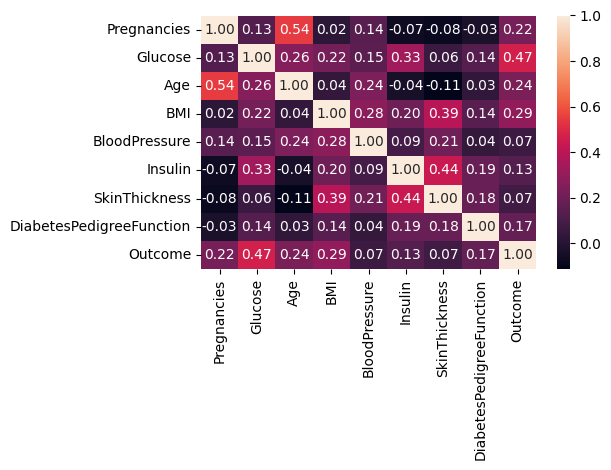

In [14]:
sns.heatmap(data[["Pregnancies", "Glucose", "Age", "BMI", "BloodPressure",
                    "Insulin", "SkinThickness", "DiabetesPedigreeFunction", "Outcome"]].corr(), annot = True, fmt = ".2f")



plt.tight_layout()

plt.show()

In [15]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


OUTLIERS

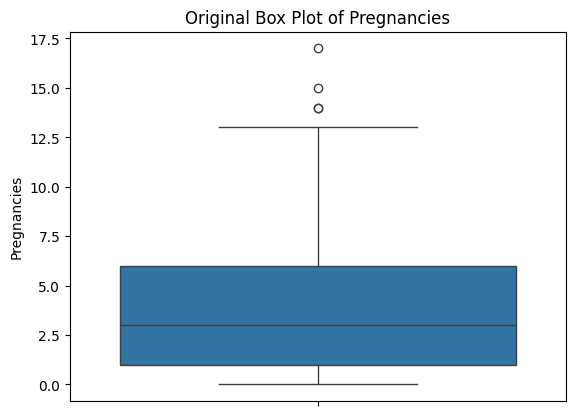

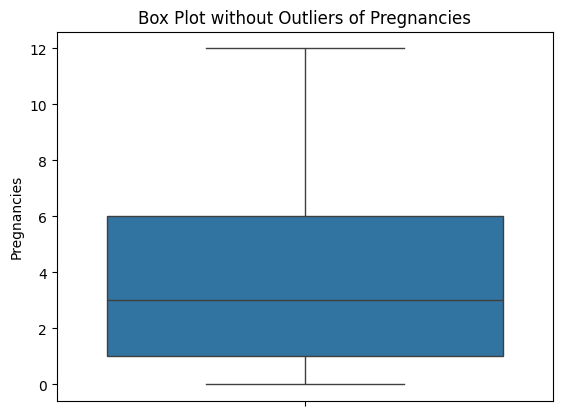

In [18]:
#Pregnancies
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers = df[df[column] <= threshold]
 
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
 
threshold_value = 12
 
no_outliers = removal_box_plot(data, 'Pregnancies', threshold_value)

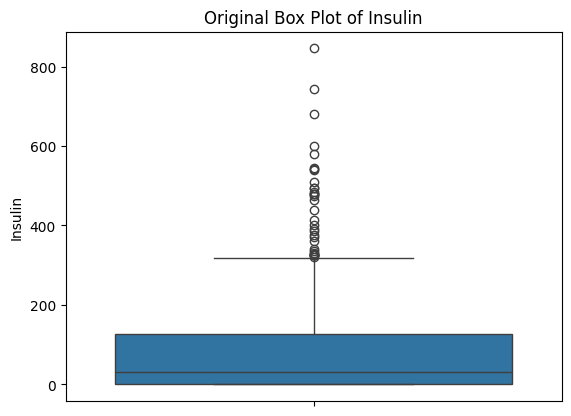

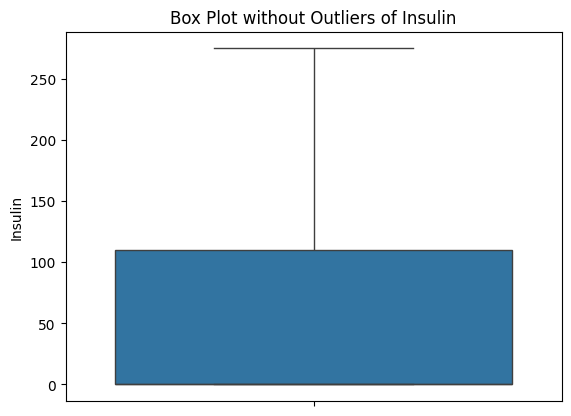

In [3]:
#Insulin
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers = df[df[column] <= threshold]
 
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
 
threshold_value = 275
 
no_outliers = removal_box_plot(data, 'Insulin', threshold_value)

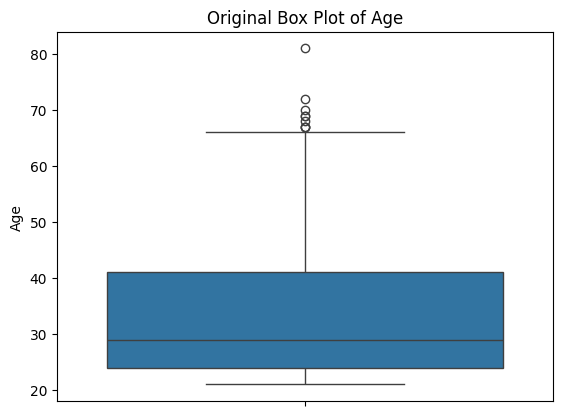

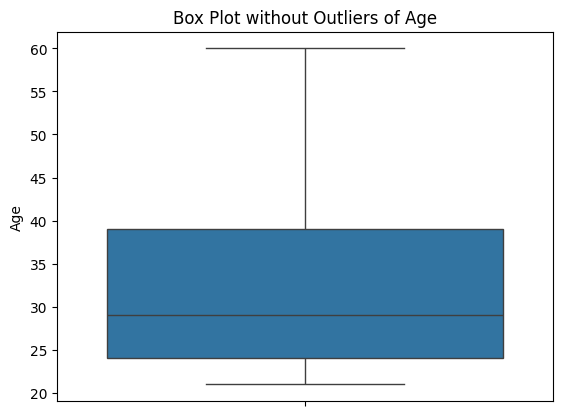

In [5]:
#Age
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers = df[df[column] <= threshold]
 
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
 
threshold_value = 60
 
no_outliers = removal_box_plot(data, 'Age', threshold_value)

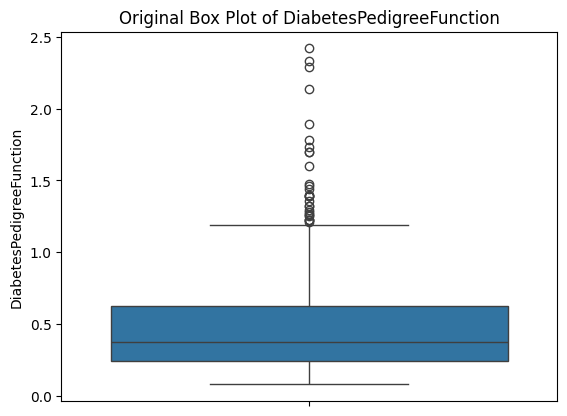

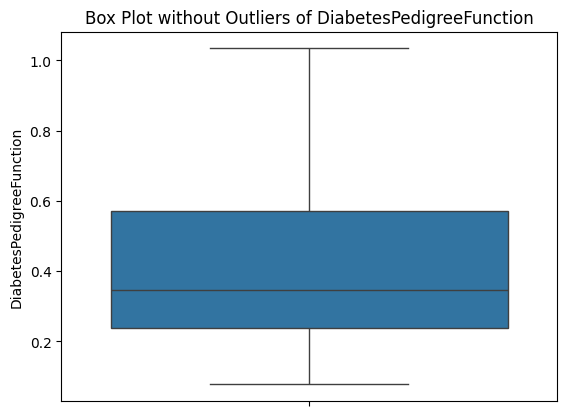

In [9]:
#Diabetes
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers = df[df[column] <= threshold]
 
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
 
threshold_value = 1.05
 
no_outliers = removal_box_plot(data, 'DiabetesPedigreeFunction', threshold_value)

In [11]:
data.to_csv("../data/interim/cleaned_data.csv", index=False)

In [13]:
X = data.drop("Outcome", axis = 1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0


In [14]:
X_test_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,98.0,58.0,190.0,34.0,0.430,43.0
1,2.0,112.0,75.0,0.0,35.7,0.148,21.0
2,2.0,108.0,64.0,0.0,30.8,0.158,21.0
3,8.0,107.0,80.0,0.0,24.6,0.856,34.0
4,7.0,136.0,90.0,0.0,29.9,0.210,50.0


ARBOL DE DECISION

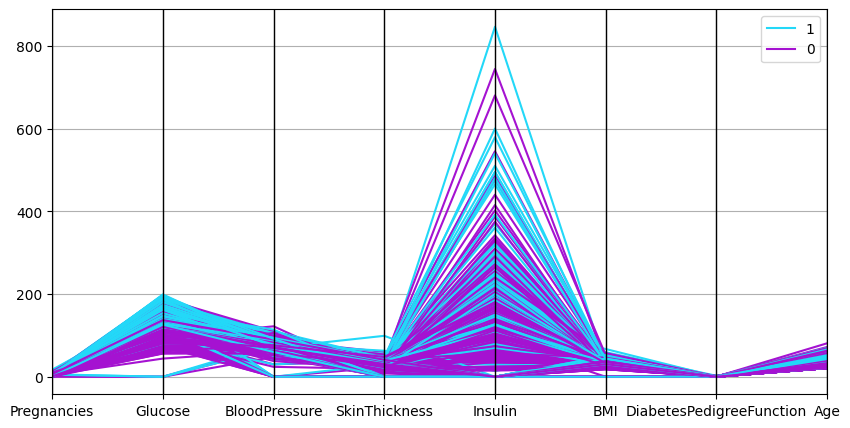

In [18]:
plt.figure(figsize=(10, 5))

pd.plotting.parallel_coordinates(data, "Outcome", color = ("#23D8F8", "#A512D1"))

plt.show()

In [24]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)
     

DecisionTreeClassifier(random_state=42)

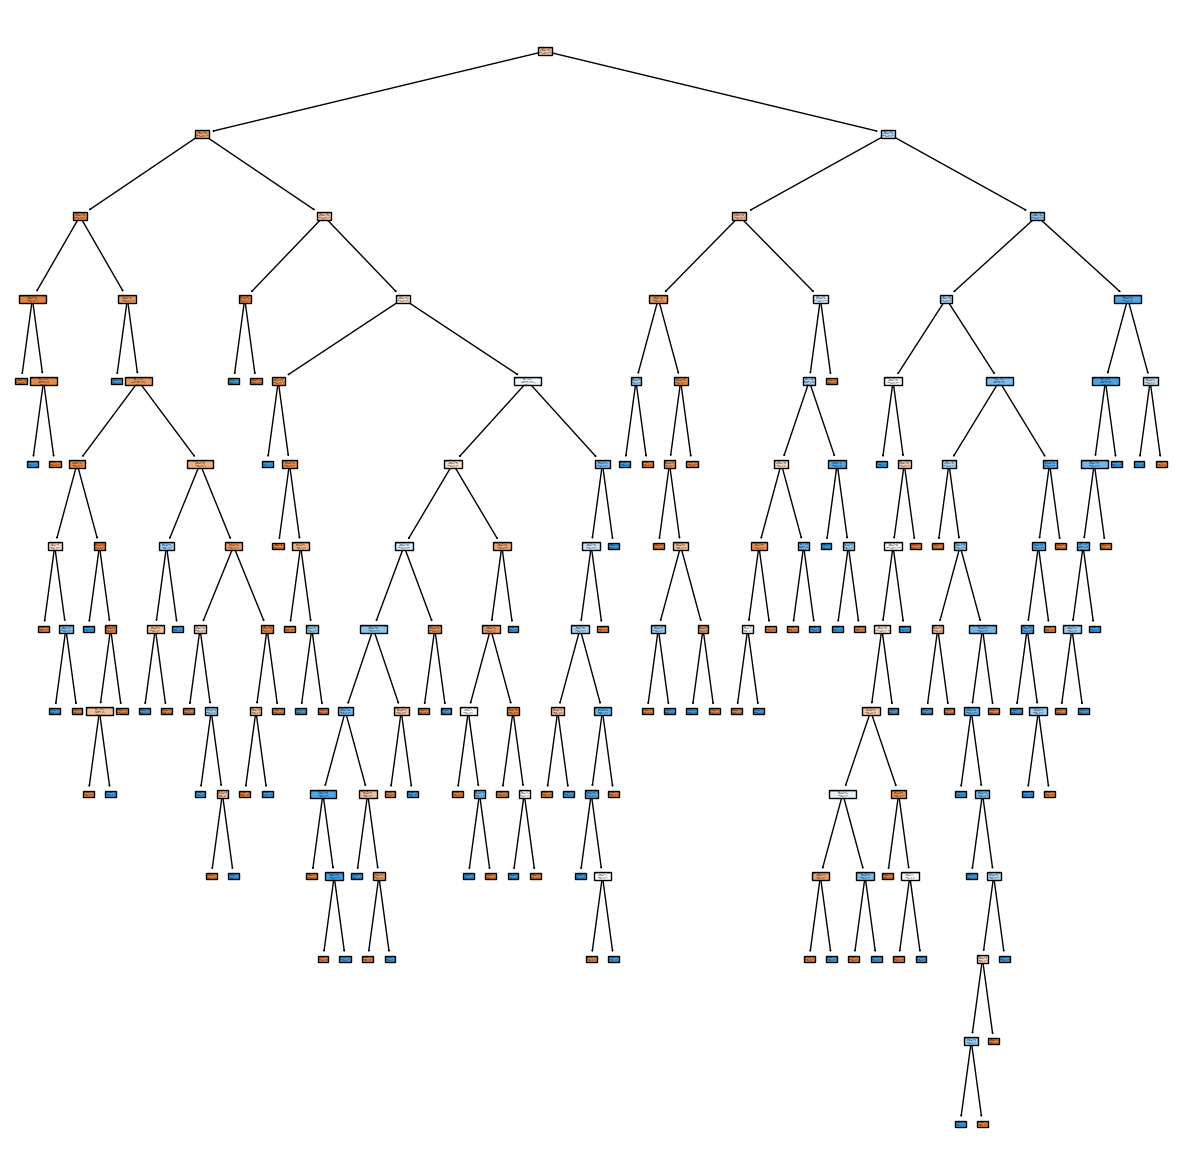

In [25]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [26]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [28]:
accuracy_score(y_test, y_pred)

0.7467532467532467

In [30]:
hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [31]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 4, min_samples_split = 2, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=42)

In [32]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [33]:
accuracy_score(y_test, y_pred)

0.7792207792207793

In [35]:
from pickle import dump

dump(model, open("../data/processed/arbolDecision.sav", "wb"))
dump(model, open("../data/processed/arbolDecision.csv", "wb"))